# Import & Read

In [1]:
# import package & library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [2]:
# load data set
data = pd.read_csv('Train.csv')

In [3]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


1 = late; 0 = on time

# Data Cleaning & Preprocessing

In [4]:
data.rename(columns={'Reached.on.Time_Y.N':'Reached_on_time'}, inplace=True)

In [5]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_time
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


### Detecting & Handling Missing Values

In [6]:
data.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached_on_time        0
dtype: int64

In [7]:
data.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached_on_time        0
dtype: int64

### Detecting & Handling Outliers

In [8]:
check_outlier = data.select_dtypes('int64')
check_outlier.columns

Index(['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Reached_on_time'],
      dtype='object')

In [9]:
# Make function to detect outlier using upper bound and lower bound
def outlier(sample):
    Q1=sample.quantile(0.25)
    Q3=sample.quantile(0.75)
    IQR=Q3-Q1
    lower_range = Q1 -(1.5 * IQR)
    upper_range = Q3 +(1.5 * IQR)
    
    number_outlier=len(sample[sample>upper_range])+len(sample[sample<lower_range])
    print("- Number of Outlier From Variable {} : {}".format(sample.name, number_outlier))
    
#     if number_outlier>0:
#         print("  Outlier observation row:")
#     else:
#         pass
#     out_list = []
    
#     for i in range(len(sample)):
#         if sample[i]<lower_range: 
#             out_list.append(i)
#         elif sample[i]>upper_range:
#             out_list.append(i) 
#         else:
#             pass
#     if out_list != []:
#         print(' ', out_list)

In [10]:
for column in check_outlier.columns:
    outlier(data[column])

- Number of Outlier From Variable ID : 0
- Number of Outlier From Variable Customer_care_calls : 0
- Number of Outlier From Variable Customer_rating : 0
- Number of Outlier From Variable Cost_of_the_Product : 0
- Number of Outlier From Variable Prior_purchases : 1003
- Number of Outlier From Variable Discount_offered : 2209
- Number of Outlier From Variable Weight_in_gms : 0
- Number of Outlier From Variable Reached_on_time : 0


<AxesSubplot:xlabel='Discount_offered'>

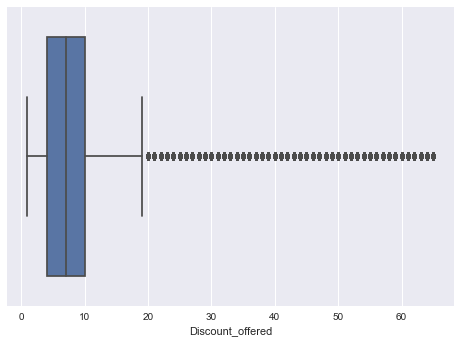

In [11]:
sns.boxplot(data['Discount_offered'])

In [12]:
data['Discount_offered'].nunique()

65

<AxesSubplot:xlabel='Prior_purchases'>

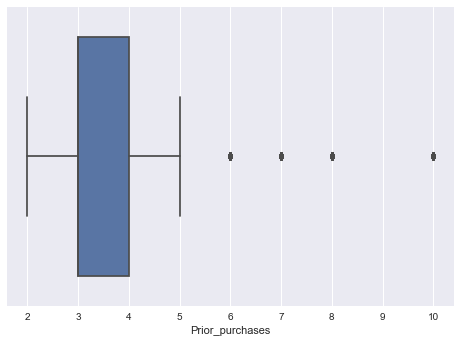

In [13]:
sns.boxplot(data['Prior_purchases'])

In [14]:
data['Prior_purchases'].nunique()

8

### Detecting & Handling Duplicates Values

In [15]:
data.duplicated().any()

False

## Exploratory Data Analysis (EDA)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached_on_time      10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [17]:
data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached_on_time
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [18]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_time
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [19]:
data.shape

(10999, 12)

In [20]:
data['Reached_on_time'].value_counts()

1    6563
0    4436
Name: Reached_on_time, dtype: int64

In [21]:
for column in data.columns:
    print('Count unique data of {} : {}'.format(column,data[column].nunique()))

Count unique data of ID : 10999
Count unique data of Warehouse_block : 5
Count unique data of Mode_of_Shipment : 3
Count unique data of Customer_care_calls : 6
Count unique data of Customer_rating : 5
Count unique data of Cost_of_the_Product : 215
Count unique data of Prior_purchases : 8
Count unique data of Product_importance : 3
Count unique data of Gender : 2
Count unique data of Discount_offered : 65
Count unique data of Weight_in_gms : 4034
Count unique data of Reached_on_time : 2


In [22]:
numerical = []
categorical = []

for column in data.columns:
    if data[column].nunique() > 10:
        numerical.append(column)
    else:
        categorical.append(column)

print('numerical : ', numerical)
print()
print('categorical: ', categorical)


numerical :  ['ID', 'Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']

categorical:  ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Prior_purchases', 'Product_importance', 'Gender', 'Reached_on_time']


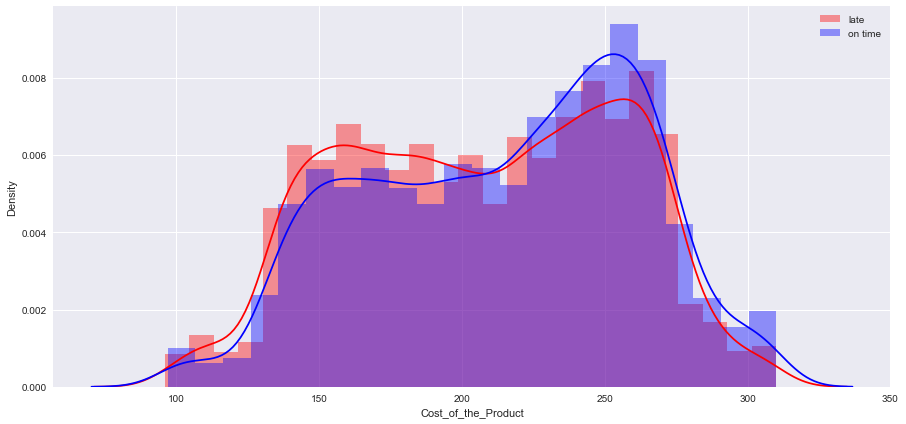

In [23]:
plt.figure(figsize=(15,7))
sns.distplot(data.Cost_of_the_Product[data['Reached_on_time'] == 1],color='r',label='late')
sns.distplot(data.Cost_of_the_Product[data['Reached_on_time'] == 0],color='b', label='on time')
plt.legend()

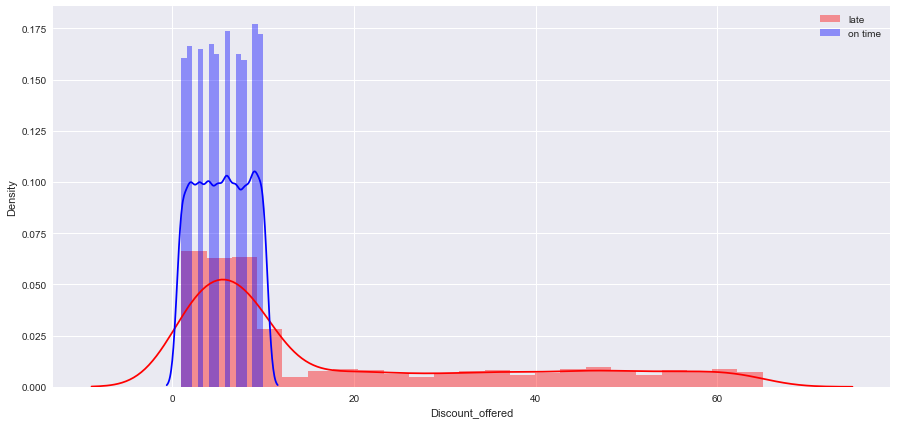

In [24]:
plt.figure(figsize=(15,7))
sns.distplot(data.Discount_offered[data['Reached_on_time'] == 1],color='r',label='late')
sns.distplot(data.Discount_offered[data['Reached_on_time'] == 0],color='b', label='on time')
plt.legend()

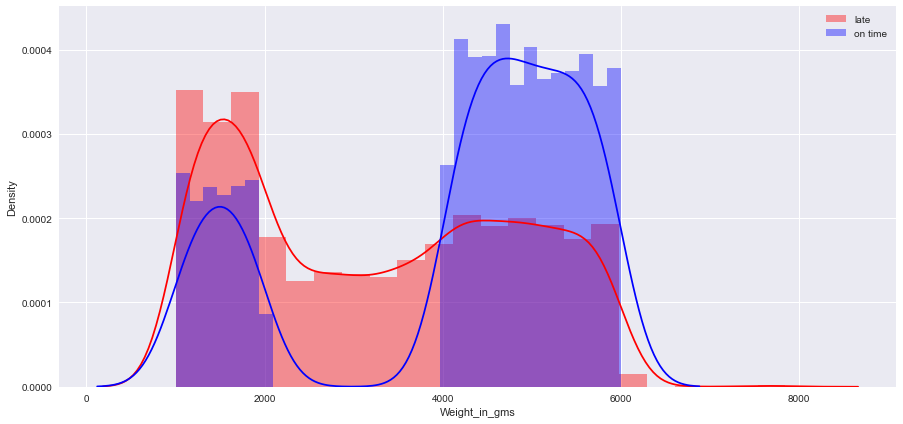

In [25]:
plt.figure(figsize=(15,7))
sns.distplot(data.Weight_in_gms[data['Reached_on_time'] == 1],color='r',label='late')
sns.distplot(data.Weight_in_gms[data['Reached_on_time'] == 0],color='b', label='on time')
plt.legend()

In [26]:
# cek berat produk 2000 - 4000

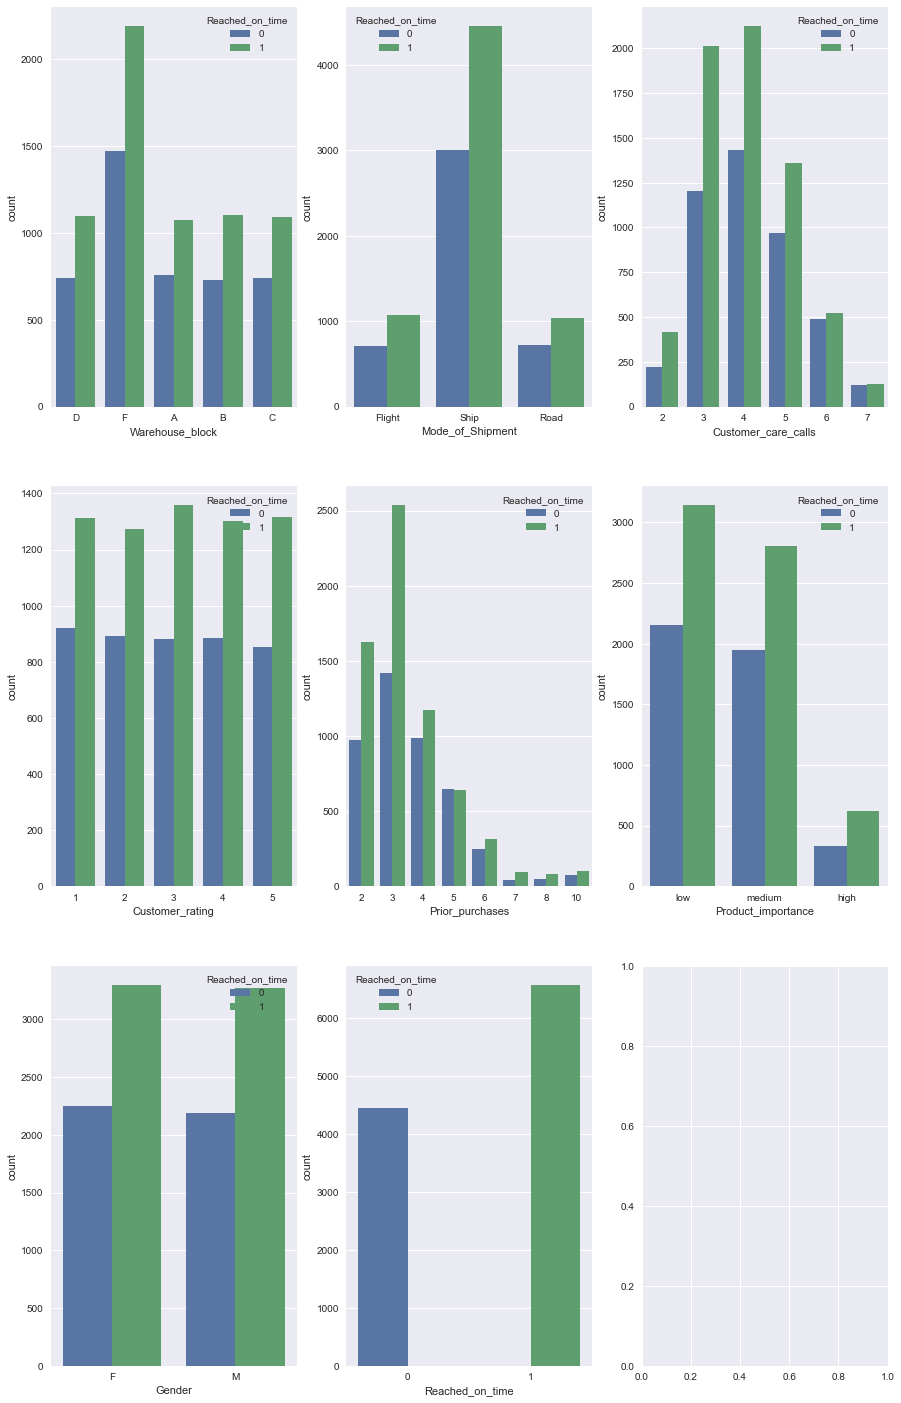

In [27]:
fig, ax = plt.subplots(3,3,figsize=(15,25))

for var, ax in zip(categorical,ax.flatten()):
    sns.countplot(var, data=data, hue='Reached_on_time', ax=ax)

In [28]:
data.corr()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached_on_time
ID,1.000000,0.188998,-0.005722,0.196791,0.145369,-0.598278,0.278312,-0.411822
Customer_care_calls,0.188998,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,-0.005722,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.196791,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.145369,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.598278,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,0.278312,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Reached_on_time,-0.411822,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


<AxesSubplot:>

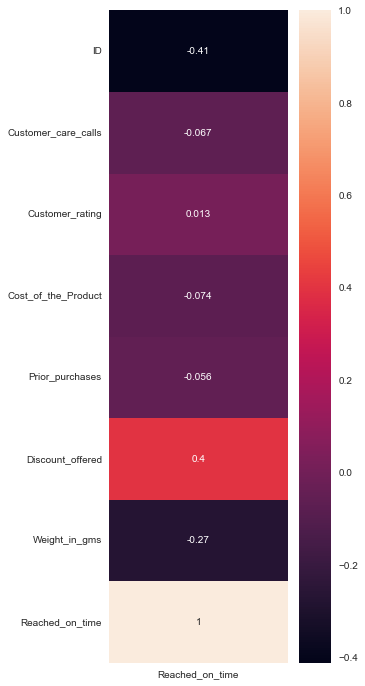

In [29]:
plt.figure(figsize=(4,12))
sns.heatmap(data.corr()[['Reached_on_time']], annot=True)

# Data Preparation

In [30]:
data = data.drop(columns=['ID'])

### Encoding

In [31]:
encode_columns = list(data.select_dtypes('object').columns)
encode_le = []
encode_ohe = []

In [32]:
for column in encode_columns:
    if data[column].nunique() > 2:
        encode_ohe.append(column)
    else:
        encode_le.append(column)

In [33]:
print(encode_le)
print(encode_ohe)

['Gender']
['Warehouse_block', 'Mode_of_Shipment', 'Product_importance']


In [34]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in encode_le:
    data[column] = le.fit_transform(data[column])

In [35]:
data = pd.get_dummies(data, columns=encode_ohe)

In [36]:
data.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Reached_on_time,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium
0,4,2,177,3,0,44,1233,1,0,0,0,1,0,1,0,0,0,1,0
1,4,5,216,2,1,59,3088,1,0,0,0,0,1,1,0,0,0,1,0
2,2,2,183,4,1,48,3374,1,1,0,0,0,0,1,0,0,0,1,0
3,3,3,176,4,1,10,1177,1,0,1,0,0,0,1,0,0,0,0,1
4,2,2,184,3,0,46,2484,1,0,0,1,0,0,1,0,0,0,0,1


### Detecting & Handling Imbalance Data

In [37]:
data['Reached_on_time'].value_counts()

1    6563
0    4436
Name: Reached_on_time, dtype: int64

<AxesSubplot:>

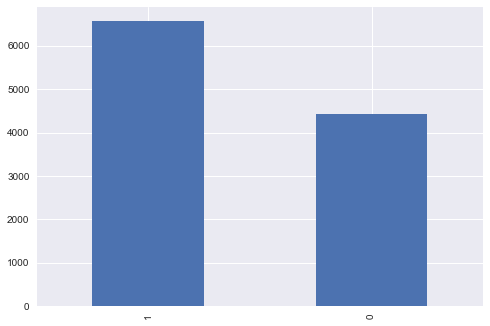

In [38]:
data['Reached_on_time'].value_counts().plot(kind='bar')

Detecting & Handling Imbalance Data - Sampling

In [39]:
!pip install imblearn

In [40]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

Detecting & Handling Imbalance Data - Variable Declaration

In [41]:
x = data.drop(['Reached_on_time'], axis=1) # features
y = data['Reached_on_time'] # target

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [43]:
smote = SMOTE(random_state=42)
under_sampling = RandomUnderSampler(random_state=42)

In [44]:
x_under, y_under = under_sampling.fit_resample(x_train, y_train)

In [45]:
x_smote, y_smote = smote.fit_resample(x_train, y_train)

In [46]:
y_under.value_counts()

0    3541
1    3541
Name: Reached_on_time, dtype: int64

In [47]:
y_smote.value_counts()

0    5258
1    5258
Name: Reached_on_time, dtype: int64

# Model & Evaluation

In [48]:
x = data.drop(['Reached_on_time'], axis=1) # features
y = data['Reached_on_time'] # target

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

Model - Decision Tree

In [50]:
# import model Decision Tree
from sklearn.tree import DecisionTreeClassifier
modelDT = DecisionTreeClassifier(criterion='gini', random_state=42)
modelDT_US = DecisionTreeClassifier(criterion='gini', random_state=42)
modelDT_OS = DecisionTreeClassifier(criterion='gini', random_state=42)

# modelling
modelDT.fit(x_train, y_train)
modelDT_US.fit(x_under, y_under)
modelDT_OS.fit(x_smote, y_smote)

DecisionTreeClassifier(random_state=42)

In [51]:
y_pred_dt = modelDT.predict(x_test)
y_pred_dt_us = modelDT_US.predict(x_test)
y_pred_dt_os = modelDT_OS.predict(x_test)

Model - Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
modelRF = RandomForestClassifier(criterion='gini',random_state=42)
modelRF_US = RandomForestClassifier(criterion='gini',random_state=42)
modelRF_OS = RandomForestClassifier(criterion='gini',random_state=42)

#modelling
modelRF.fit(x_train,y_train)
modelRF_US.fit(x_under,y_under)
modelRF_OS.fit(x_smote,y_smote)

RandomForestClassifier(random_state=42)

In [54]:
y_pred_rf = modelRF.predict(x_test)
y_pred_rf_us = modelRF_US.predict(x_test)
y_pred_rf_os = modelRF_OS.predict(x_test)

Model - XGBoost

In [55]:
from xgboost import XGBClassifier

In [56]:
modelXGB = XGBClassifier()
modelXGB_US = XGBClassifier()
modelXGB_OS = XGBClassifier()

modelXGB.fit(x_train,y_train)
modelXGB_US.fit(x_under,y_under)
modelXGB_OS.fit(x_smote,y_smote)

[19:16:10] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:16:11] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:16:11] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
y_pred_xgb = modelXGB.predict(x_test)
y_pred_xgb_us = modelXGB_US.predict(x_test)
y_pred_xgb_os = modelXGB_OS.predict(x_test)

Compare

In [58]:
# bandingkan data actual dan prediksi
compare = pd.DataFrame({
    'Actual' : y_test,
    'Prediction DT' : y_pred_dt,
    'Prediction DT US' : y_pred_dt_us,
    'Prediction DT OS' : y_pred_dt_os,
    'Prediction RF' : y_pred_rf,
    'Prediction RF US' : y_pred_rf_us,
    'Prediction RF OS' : y_pred_rf_os,
    'Prediction XGB' : y_pred_xgb,
    'Prediction XGB US' : y_pred_xgb_us,
    'Prediction XGB OS' : y_pred_xgb_os,
}).reset_index()
compare.head()

,index,Actual,Prediction DT,Prediction DT US,Prediction DT OS,Prediction RF,Prediction RF US,Prediction RF OS,Prediction XGB,Prediction XGB US,Prediction XGB OS
0,107,1,1,1,1,1,1,1,1,1,1
1,5594,1,1,1,1,0,0,0,1,0,1
2,6997,0,1,0,1,1,0,1,1,1,1
3,3984,0,0,0,1,0,0,0,1,1,1
4,3111,1,1,1,1,1,1,1,1,1,1


## Evaluation

In [59]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Evaluation - Confussion Matrix

In [60]:
# cm decision tree
print('Decision Tree - No Sampling')
print(confusion_matrix(y_test,y_pred_dt))
print('-'*30)
print('Decision Tree - Undersampling')
print(confusion_matrix(y_test,y_pred_dt_us))
print('-'*30)
print('Decision Tree - Oversampling')
print(confusion_matrix(y_test,y_pred_dt_os))

Decision Tree - No Sampling
[[512 383]
 [392 913]]
------------------------------
Decision Tree - Undersampling
[[585 310]
 [424 881]]
------------------------------
Decision Tree - Oversampling
[[498 397]
 [391 914]]


In [61]:
# cm random forest
print('Random Forest - No Sampling')
print(confusion_matrix(y_test,y_pred_rf))
print('-'*30)
print('Random Forest - Undersampling')
print(confusion_matrix(y_test,y_pred_rf_us))
print('-'*30)
print('Random Forest - Oversampling')
print(confusion_matrix(y_test,y_pred_rf_os))

Random Forest - No Sampling
[[625 270]
 [459 846]]
------------------------------
Random Forest - Undersampling
[[809  86]
 [589 716]]
------------------------------
Random Forest - Oversampling
[[644 251]
 [488 817]]


In [62]:
# cm xgboost
print('XGBoost - No Sampling')
print(confusion_matrix(y_test,y_pred_xgb))
print('-'*30)
print('XGBoost - Undersampling')
print(confusion_matrix(y_test,y_pred_xgb_us))
print('-'*30)
print('XGBoost - Oversampling')
print(confusion_matrix(y_test,y_pred_xgb_os))

XGBoost - No Sampling
[[581 314]
 [433 872]]
------------------------------
XGBoost - Undersampling
[[759 136]
 [571 734]]
------------------------------
XGBoost - Oversampling
[[604 291]
 [451 854]]


Text(0.5, 25.0, 'Prediction')

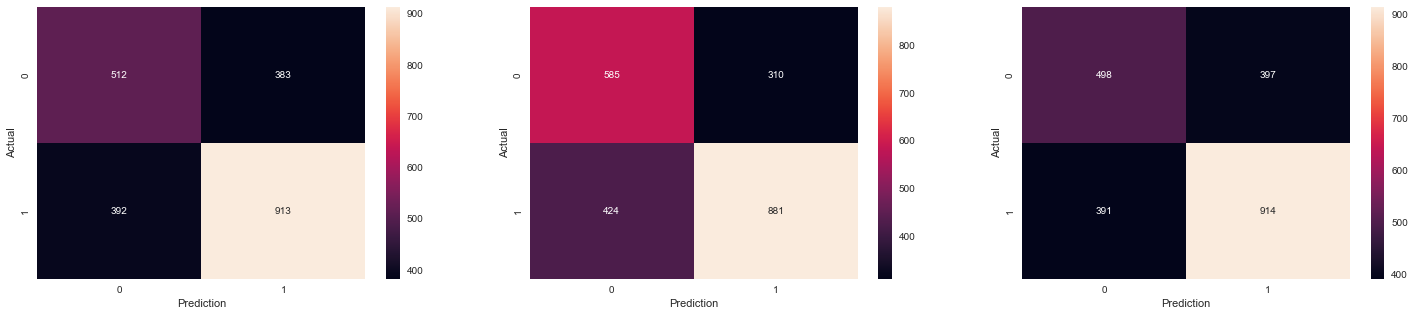

In [63]:
# visualisasi cm decision tree
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(25,5))

g1 = sns.heatmap(confusion_matrix(y_test,y_pred_dt),annot=True, fmt='.3g', ax=ax1)
g1.set_ylabel('Actual')
g1.set_xlabel('Prediction')

g2 = sns.heatmap(confusion_matrix(y_test,y_pred_dt_us),annot=True, fmt='.3g', ax=ax2)
g2.set_ylabel('Actual')
g2.set_xlabel('Prediction')

g3 = sns.heatmap(confusion_matrix(y_test,y_pred_dt_os),annot=True, fmt='.3g', ax=ax3)
g3.set_ylabel('Actual')
g3.set_xlabel('Prediction')

Text(0.5, 25.0, 'Prediction')

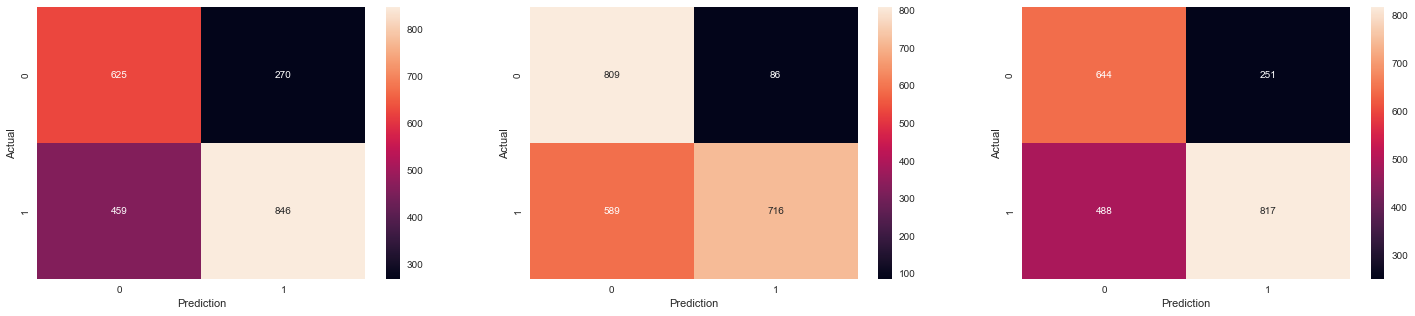

In [64]:
# visualisasi cm random forest
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(25,5))

g1 = sns.heatmap(confusion_matrix(y_test,y_pred_rf),annot=True, fmt='.3g', ax=ax1)
g1.set_ylabel('Actual')
g1.set_xlabel('Prediction')

g2 = sns.heatmap(confusion_matrix(y_test,y_pred_rf_us),annot=True, fmt='.3g', ax=ax2)
g2.set_ylabel('Actual')
g2.set_xlabel('Prediction')

g3 = sns.heatmap(confusion_matrix(y_test,y_pred_rf_os),annot=True, fmt='.3g', ax=ax3)
g3.set_ylabel('Actual')
g3.set_xlabel('Prediction')

Text(0.5, 25.0, 'Prediction')

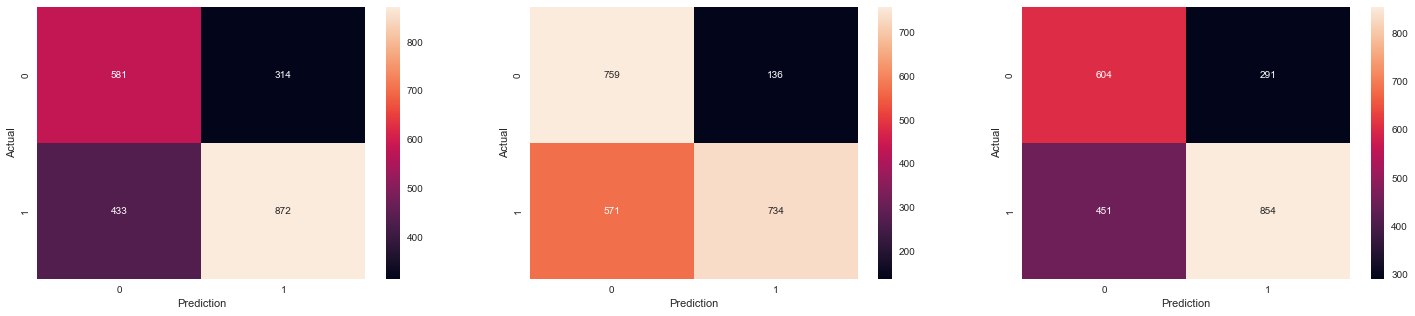

In [65]:
# visualisasi cm xgboost
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(25,5))

g1 = sns.heatmap(confusion_matrix(y_test,y_pred_xgb),annot=True, fmt='.3g', ax=ax1)
g1.set_ylabel('Actual')
g1.set_xlabel('Prediction')

g2 = sns.heatmap(confusion_matrix(y_test,y_pred_xgb_us),annot=True, fmt='.3g', ax=ax2)
g2.set_ylabel('Actual')
g2.set_xlabel('Prediction')

g3 = sns.heatmap(confusion_matrix(y_test,y_pred_xgb_os),annot=True, fmt='.3g', ax=ax3)
g3.set_ylabel('Actual')
g3.set_xlabel('Prediction')

Evaluation - Classification Report

In [66]:
# cr decision tree
print(classification_report(y_test,y_pred_dt))
print('-'*55)
print(classification_report(y_test,y_pred_dt_us))
print('-'*55)
print(classification_report(y_test,y_pred_dt_os))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57       895
           1       0.70      0.70      0.70      1305

    accuracy                           0.65      2200
   macro avg       0.64      0.64      0.64      2200
weighted avg       0.65      0.65      0.65      2200

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.58      0.65      0.61       895
           1       0.74      0.68      0.71      1305

    accuracy                           0.67      2200
   macro avg       0.66      0.66      0.66      2200
weighted avg       0.67      0.67      0.67      2200

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.56      0.56      0.56       895
           1       0.70      0.70      0.70      1305

    accuracy                           0.64      2200
   macro avg    

In [88]:
# cr random forest
print(classification_report(y_test,y_pred_rf))
print('-'*55)
print(classification_report(y_test,y_pred_rf_us))
print('-'*55)
print(classification_report(y_test,y_pred_rf_os))

              precision    recall  f1-score   support

           0       0.58      0.70      0.63       895
           1       0.76      0.65      0.70      1305

    accuracy                           0.67      2200
   macro avg       0.67      0.67      0.67      2200
weighted avg       0.68      0.67      0.67      2200

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.58      0.90      0.71       895
           1       0.89      0.55      0.68      1305

    accuracy                           0.69      2200
   macro avg       0.74      0.73      0.69      2200
weighted avg       0.76      0.69      0.69      2200

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.57      0.72      0.64       895
           1       0.76      0.63      0.69      1305

    accuracy                           0.66      2200
   macro avg    

In [68]:
# cr xgboost
print(classification_report(y_test,y_pred_xgb))
print('-'*55)
print(classification_report(y_test,y_pred_xgb_us))
print('-'*55)
print(classification_report(y_test,y_pred_xgb_os))

              precision    recall  f1-score   support

           0       0.57      0.65      0.61       895
           1       0.74      0.67      0.70      1305

    accuracy                           0.66      2200
   macro avg       0.65      0.66      0.65      2200
weighted avg       0.67      0.66      0.66      2200

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.57      0.85      0.68       895
           1       0.84      0.56      0.67      1305

    accuracy                           0.68      2200
   macro avg       0.71      0.71      0.68      2200
weighted avg       0.73      0.68      0.68      2200

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.57      0.67      0.62       895
           1       0.75      0.65      0.70      1305

    accuracy                           0.66      2200
   macro avg    

Evaluation - Accuracy Score

In [69]:
# score decision tree
print('Decision Tree :', "{:.2f}".format(accuracy_score(y_test, y_pred_dt)*100))
print('Decision Tree (undersampling) :', "{:.2f}".format(accuracy_score(y_test, y_pred_dt_us)*100))
print('Decision Tree (oversampling) :', "{:.2f}".format(accuracy_score(y_test, y_pred_dt_os)*100))
print('-'*100)
print('Random Forest :', "{:.2f}".format(accuracy_score(y_test, y_pred_rf)*100))
print('Random Forest (undersampling) :', "{:.2f}".format(accuracy_score(y_test, y_pred_rf_us)*100))
print('Random Forest (oversampling) :', "{:.2f}".format(accuracy_score(y_test, y_pred_rf_os)*100))
print('-'*100)
print('XGBoost :', "{:.2f}".format(accuracy_score(y_test, y_pred_xgb)*100))
print('XGBoost (undersampling) :', "{:.2f}".format(accuracy_score(y_test, y_pred_xgb_us)*100))
print('XGBoost (oversampling) :', "{:.2f}".format(accuracy_score(y_test, y_pred_xgb_os)*100))

Decision Tree : 64.77
Decision Tree (undersampling) : 66.64
Decision Tree (oversampling) : 64.18
----------------------------------------------------------------------------------------------------
Random Forest : 66.86
Random Forest (undersampling) : 69.32
Random Forest (oversampling) : 66.41
----------------------------------------------------------------------------------------------------
XGBoost : 66.05
XGBoost (undersampling) : 67.86
XGBoost (oversampling) : 66.27


# Tuning

### Feature Selection

In [70]:
importance_DT = modelDT.feature_importances_
importance_RF = modelRF.feature_importances_
importance_XGB = modelXGB.feature_importances_

In [71]:
columns = list(data.columns)
columns.remove('Reached_on_time')

In [72]:
data_imp = pd.DataFrame({'columns' : columns,
                      'Importance DT' : importance_DT,
                      'Importance RF' : importance_RF,
                      'Importance XGB' : importance_XGB,
                        })
data_imp

,columns,Importance DT,Importance RF,Importance XGB
0,Customer_care_calls,0.042278,0.056038,0.039903
1,Customer_rating,0.049184,0.059714,0.034769
2,Cost_of_the_Product,0.161648,0.168694,0.037649
3,Prior_purchases,0.055765,0.063887,0.066442
4,Gender,0.016618,0.023625,0.033979
5,Discount_offered,0.296890,0.228606,0.336095
6,Weight_in_gms,0.226937,0.258414,0.047113
7,Warehouse_block_A,0.018612,0.012635,0.043402
8,Warehouse_block_B,0.013842,0.012639,0.038426
9,Warehouse_block_C,0.014267,0.012782,0.037242


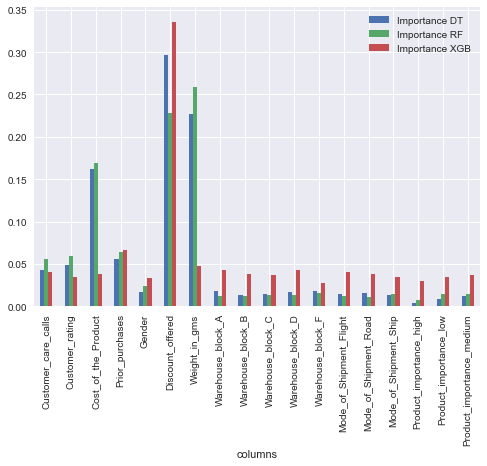

In [73]:
data_imp.set_index('columns').plot.bar()
plt.legend()

In [74]:
data_fs_dt = data_imp[['columns','Importance DT']].nlargest(5,'Importance DT')['columns']
data_fs_rf = data_imp[['columns','Importance RF']].nlargest(5,'Importance RF')['columns']
data_fs_xgb = data_imp[['columns','Importance XGB']].nlargest(5,'Importance XGB')['columns']

In [75]:
print(data_fs_dt)
print('-'*100)
print(data_fs_rf)
print('-'*100)
print(data_fs_xgb)
print('-'*100)

5       Discount_offered
6          Weight_in_gms
2    Cost_of_the_Product
3        Prior_purchases
1        Customer_rating
Name: columns, dtype: object
----------------------------------------------------------------------------------------------------
6          Weight_in_gms
5       Discount_offered
2    Cost_of_the_Product
3        Prior_purchases
1        Customer_rating
Name: columns, dtype: object
----------------------------------------------------------------------------------------------------
5      Discount_offered
3       Prior_purchases
6         Weight_in_gms
7     Warehouse_block_A
10    Warehouse_block_D
Name: columns, dtype: object
----------------------------------------------------------------------------------------------------


In [76]:
x_fs_dt = data[data_fs_dt]
x_fs_rf = data[data_fs_rf]
x_fs_xgb = data[data_fs_xgb]

In [77]:
x_train_fs_dt, x_test_fs_dt, y_train_fs_dt, y_test_fs_dt = train_test_split(x_fs_dt,y, test_size=0.2, random_state=42)
x_train_fs_rf, x_test_fs_rf, y_train_fs_rf, y_test_fs_rf = train_test_split(x_fs_rf,y, test_size=0.2, random_state=42)
x_train_fs_xgb, x_test_fs_xgb, y_train_fs_xgb, y_test_fs_xgb = train_test_split(x_fs_xgb,y, test_size=0.2, random_state=42)

In [78]:
modelDT_FS = DecisionTreeClassifier(criterion='gini', random_state=42)
modelRF_FS = RandomForestClassifier(criterion='gini',random_state=42)
modelXGB_FS = XGBClassifier()\

# modelling
modelDT_FS.fit(x_train_fs_dt, y_train_fs_dt)
modelRF_FS.fit(x_train_fs_rf, y_train_fs_rf)
modelXGB_FS.fit(x_train_fs_xgb,y_train_fs_xgb)

[19:16:16] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [79]:
y_pred_dt_fs = modelDT_FS.predict(x_test_fs_dt)
y_pred_rf_fs = modelRF_FS.predict(x_test_fs_rf)
y_pred_xgb_fs = modelXGB_FS.predict(x_test_fs_xgb)

In [80]:
# score decision tree
print('Decision Tree :', "{:.2f}".format(accuracy_score(y_test, y_pred_dt)*100))
print('Decision Tree (undersampling) :', "{:.2f}".format(accuracy_score(y_test, y_pred_dt_us)*100))
print('Decision Tree (oversampling) :', "{:.2f}".format(accuracy_score(y_test, y_pred_dt_os)*100))
print('Decision Tree (Feature Selection) :', "{:.2f}".format(accuracy_score(y_test_fs_dt, y_pred_dt_fs)*100))
print('-'*100)
print('Random Forest :', "{:.2f}".format(accuracy_score(y_test, y_pred_rf)*100))
print('Random Forest (undersampling) :', "{:.2f}".format(accuracy_score(y_test, y_pred_rf_us)*100))
print('Random Forest (oversampling) :', "{:.2f}".format(accuracy_score(y_test, y_pred_rf_os)*100))
print('Random Forest (Feature Selection) :', "{:.2f}".format(accuracy_score(y_test_fs_rf, y_pred_rf_fs)*100))
print('-'*100)
print('XGBoost :', "{:.2f}".format(accuracy_score(y_test, y_pred_xgb)*100))
print('XGBoost (undersampling) :', "{:.2f}".format(accuracy_score(y_test, y_pred_xgb_us)*100))
print('XGBoost (oversampling) :', "{:.2f}".format(accuracy_score(y_test, y_pred_xgb_os)*100))
print('XGBoost (Feature Selection) :', "{:.2f}".format(accuracy_score(y_test_fs_xgb, y_pred_xgb_fs)*100))

Decision Tree : 64.77
Decision Tree (undersampling) : 66.64
Decision Tree (oversampling) : 64.18
Decision Tree (Feature Selection) : 63.77
----------------------------------------------------------------------------------------------------
Random Forest : 66.86
Random Forest (undersampling) : 69.32
Random Forest (oversampling) : 66.41
Random Forest (Feature Selection) : 65.91
----------------------------------------------------------------------------------------------------
XGBoost : 66.05
XGBoost (undersampling) : 67.86
XGBoost (oversampling) : 66.27
XGBoost (Feature Selection) : 66.09


### Tuning - GridSearchCV

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
paramsDT = {
    'criterion' : ['gini','entropy'],
    'splitter' : ['best','random'],
    'max_depth' : range(1,10),
    'max_features' : ['auto', 'sqrt, log2'],
    'min_samples_split': range(1, 10),
    'min_samples_leaf': range(1, 5)
}

paramsRF = {
     'n_estimators' : [100, 200, 300, 400, 500],
     'criterion' : ['gini','entropy'],
     'max_depth': range(1,10),
     'max_features' : ['auto', 'sqrt, log2'],
}

paramsXGB = {
    'n_estimators' : [100, 200, 300, 400, 500],
    'max_depth': range(1,10),
}

In [83]:
# modeling DT
modelDT = GridSearchCV(DecisionTreeClassifier(),paramsDT,cv=3,verbose=1,n_jobs=-1)
modelDT_US = GridSearchCV(DecisionTreeClassifier(),paramsDT,cv=3,verbose=1,n_jobs=-1)
modelDT_OS = GridSearchCV(DecisionTreeClassifier(),paramsDT,cv=3,verbose=1,n_jobs=-1)
modelDT_FS = GridSearchCV(DecisionTreeClassifier(),paramsDT,cv=3,verbose=1,n_jobs=-1)

# modeling RF
modelRF = GridSearchCV(RandomForestClassifier(),paramsRF,cv=3,verbose=1,n_jobs=-1)
modelRF_US = GridSearchCV(RandomForestClassifier(),paramsRF,cv=3,verbose=1,n_jobs=-1)
modelRF_OS = GridSearchCV(RandomForestClassifier(),paramsRF,cv=3,verbose=1,n_jobs=-1)
modelRF_FS = GridSearchCV(RandomForestClassifier(),paramsRF,cv=3,verbose=1,n_jobs=-1)

# modeling XGB
modelXGB = GridSearchCV(XGBClassifier(),paramsXGB,cv=3,verbose=1,n_jobs=-1)
modelXGB_US = GridSearchCV(XGBClassifier(),paramsXGB,cv=3,verbose=1,n_jobs=-1)
modelXGB_OS = GridSearchCV(XGBClassifier(),paramsXGB,cv=3,verbose=1,n_jobs=-1)
modelXGB_FS = GridSearchCV(XGBClassifier(),paramsXGB,cv=3,verbose=1,n_jobs=-1)

In [84]:
# fitting DT
modelDT.fit(x_train,y_train)
modelDT_US.fit(x_under,y_under)
modelDT_OS.fit(x_smote,y_smote)
modelDT_FS.fit(x_train_fs_dt,y_train_fs_dt)

# fitting RF
modelRF.fit(x_train,y_train)
modelRF_US.fit(x_under,y_under)
modelRF_OS.fit(x_smote,y_smote)
modelRF_FS.fit(x_train_fs_rf,y_train_fs_rf)

# fitting XGB
modelXGB.fit(x_train,y_train)
modelXGB_US.fit(x_under,y_under)
modelXGB_OS.fit(x_smote,y_smote)
modelXGB_FS.fit(x_train_fs_xgb,y_train_fs_xgb)


Fitting 3 folds for each of 2592 candidates, totalling 7776 fits
Fitting 3 folds for each of 2592 candidates, totalling 7776 fits
Fitting 3 folds for each of 2592 candidates, totalling 7776 fits
Fitting 3 folds for each of 2592 candidates, totalling 7776 fits
Fitting 3 folds for each of 180 candidates, totalling 540 fits
Fitting 3 folds for each of 180 candidates, totalling 540 fits
Fitting 3 folds for each of 180 candidates, totalling 540 fits
Fitting 3 folds for each of 180 candidates, totalling 540 fits
Fitting 3 folds for each of 45 candidates, totalling 135 fits
[19:30:54] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 3 folds for each of 45 candidates, totalling 135 fits
[19:32:34] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

In [85]:
print('Decision Tree - Best Params')
print(modelDT.best_params_)
print(modelDT_US.best_params_)
print(modelDT_OS.best_params_)
print(modelDT_FS.best_params_)
print('-'*60)
print('Random Forest - Best Params')
print(modelRF.best_params_)
print(modelRF_US.best_params_)
print(modelRF_OS.best_params_)
print(modelRF_FS.best_params_)
print('-'*60)
print('XGB - Best Params')
print(modelXGB.best_params_)
print(modelXGB_US.best_params_)
print(modelXGB_OS.best_params_)
print(modelXGB_FS.best_params_)
print('-'*60)

Decision Tree - Best Params
{'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'best'}
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6, 'splitter': 'best'}
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'best'}
------------------------------------------------------------
Random Forest - Best Params
{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 300}
{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 100}
{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}
-----------------------

In [86]:
print('Decision Tree - Best Score')
print(modelDT.best_score_)
print(modelDT_US.best_score_)
print(modelDT_OS.best_score_)
print(modelDT_FS.best_score_)
print('-'*60)
print('Random Forest - Best Score')
print(modelRF.best_score_)
print(modelRF_US.best_score_)
print(modelRF_OS.best_score_)
print(modelRF_FS.best_score_)
print('-'*60)
print('XGB - Best Score')
print(modelXGB.best_score_)
print(modelXGB_US.best_score_)
print(modelXGB_OS.best_score_)
print(modelXGB_FS.best_score_)
print('-'*60)

Decision Tree - Best Score
0.6771224002727583
0.7324202494873139
0.7145303520166095
0.6823502670758042
------------------------------------------------------------
Random Forest - Best Score
0.6793953858393
0.7355271753566069
0.7310759437187903
0.6832594613024208
------------------------------------------------------------
XGB - Best Score
0.6704170928514603
0.7300196579539935
0.6890466421397297
0.6670076145016478
------------------------------------------------------------


In [87]:
print('Decision Tree :', "{:.2f}".format(accuracy_score(y_test, y_pred_dt)*100))
print('Decision Tree (undersampling) :', "{:.2f}".format(accuracy_score(y_test, y_pred_dt_us)*100))
print('Decision Tree (oversampling) :', "{:.2f}".format(accuracy_score(y_test, y_pred_dt_os)*100))
print('Decision Tree (Feature Selection) :', "{:.2f}".format(accuracy_score(y_test_fs_dt, y_pred_dt_fs)*100))
print('Decision Tree (Tuning):', "{:.2f}".format(modelDT.best_score_*100))
print('Decision Tree (Tuning & Undersampling):', "{:.2f}".format(modelDT_US.best_score_*100))
print('Decision Tree (Tuning & Oversampling):', "{:.2f}".format(modelDT_OS.best_score_*100))
print('Decision Tree (Tuning & Feature Selection):', "{:.2f}".format(modelDT_FS.best_score_*100))
print('-'*100)
print('Random Forest :', "{:.2f}".format(accuracy_score(y_test, y_pred_rf)*100))
print('Random Forest (undersampling) :', "{:.2f}".format(accuracy_score(y_test, y_pred_rf_us)*100))
print('Random Forest (oversampling) :', "{:.2f}".format(accuracy_score(y_test, y_pred_rf_os)*100))
print('Random Forest (Feature Selection) :', "{:.2f}".format(accuracy_score(y_test_fs_rf, y_pred_rf_fs)*100))
print('Random Forest (Tuning):', "{:.2f}".format(modelRF.best_score_*100))
print('Random Forest (Tuning & Undersampling):', "{:.2f}".format(modelRF_US.best_score_*100))
print('Random Forest (Tuning & Oversampling):', "{:.2f}".format(modelRF_OS.best_score_*100))
print('Random Forest (Tuning & Feature Selection):', "{:.2f}".format(modelRF_FS.best_score_*100))
print('-'*100)
print('XGBoost :', "{:.2f}".format(accuracy_score(y_test, y_pred_xgb)*100))
print('XGBoost (undersampling) :', "{:.2f}".format(accuracy_score(y_test, y_pred_xgb_us)*100))
print('XGBoost (oversampling) :', "{:.2f}".format(accuracy_score(y_test, y_pred_xgb_os)*100))
print('XGBoost (Feature Selection) :', "{:.2f}".format(accuracy_score(y_test_fs_xgb, y_pred_xgb_fs)*100))
print('XGBoost (Tuning):', "{:.2f}".format(modelXGB.best_score_*100))
print('XGBoost (Tuning & Undersampling):', "{:.2f}".format(modelXGB_US.best_score_*100))
print('XGBoost (Tuning & Oversampling):', "{:.2f}".format(modelXGB_OS.best_score_*100))
print('XGBoost (Tuning & Feature Selection):', "{:.2f}".format(modelXGB_FS.best_score_*100))

Decision Tree : 64.77
Decision Tree (undersampling) : 66.64
Decision Tree (oversampling) : 64.18
Decision Tree (Feature Selection) : 63.77
Decision Tree (Tuning): 67.71
Decision Tree (Tuning & Undersampling): 73.24
Decision Tree (Tuning & Oversampling): 71.45
Decision Tree (Tuning & Feature Selection): 68.24
----------------------------------------------------------------------------------------------------
Random Forest : 66.86
Random Forest (undersampling) : 69.32
Random Forest (oversampling) : 66.41
Random Forest (Feature Selection) : 65.91
Random Forest (Tuning): 67.94
Random Forest (Tuning & Undersampling): 73.55
Random Forest (Tuning & Oversampling): 73.11
Random Forest (Tuning & Feature Selection): 68.33
----------------------------------------------------------------------------------------------------
XGBoost : 66.05
XGBoost (undersampling) : 67.86
XGBoost (oversampling) : 66.27
XGBoost (Feature Selection) : 66.09
XGBoost (Tuning): 67.04
XGBoost (Tuning & Undersampling): 73.00